# final model
this model is combination of Avellneda-Stoikov(2008) and Gueant(2012) models with moving volatility. in the previous notebook i gridsearched hyperparameters. 
*k=1.0, A=1.0, gamma=[0.001, 1.0]* \
difference between gammas in risk: gamma=1.0 more robust to price jumps (fluctuation near 0-inventory) whereas gamma=0.001 more risky and, in case of our asset highly volatile, our pnl will be highly volatile too. \
lets check these gammas on new md and compare results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path = 'btcusdt_'

lobs = pd.read_csv(f'{path}lob.csv')
trades = pd.read_csv(f'{path}trades.csv')

In [3]:
#check if data has nones
lobs.isna().sum().sum()+trades.isna().sum().sum()

0

In [4]:
lobs['receive_ts'] = pd.to_datetime(lobs['receive_ts'])

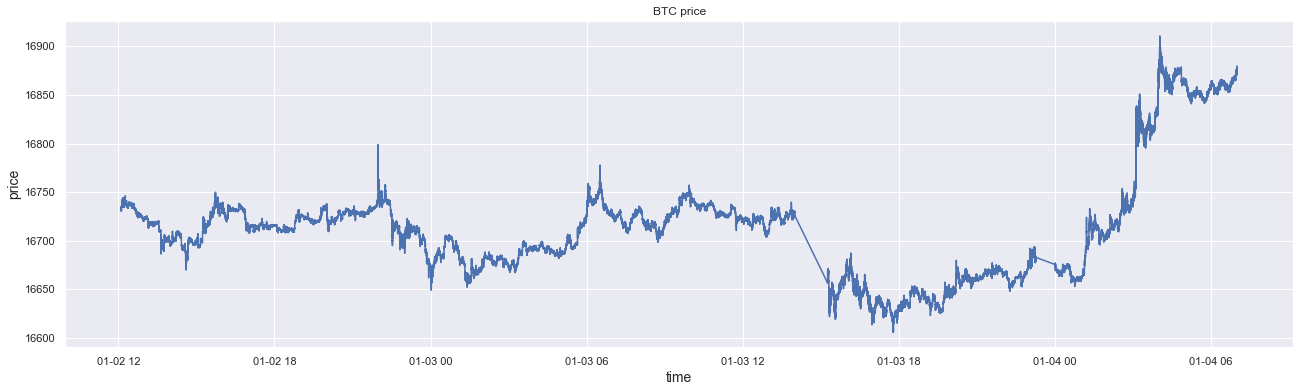

In [5]:
plt.figure(figsize=(22,6))
plt.plot(lobs['receive_ts'], lobs['btcusdt:Binance:Spot_ask_price_0'])
plt.title("BTC price")
plt.xlabel('time', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.show()

lets make a slice of market data with some jumps in price (kind of stress test for models) ans check current inventory, pnl and total volume


In [6]:
start_time = '2023-01-02 21:00:00'
end_time = '2023-01-03 06:00:00'

df = lobs[(lobs.receive_ts > start_time) & (lobs.receive_ts < end_time)]

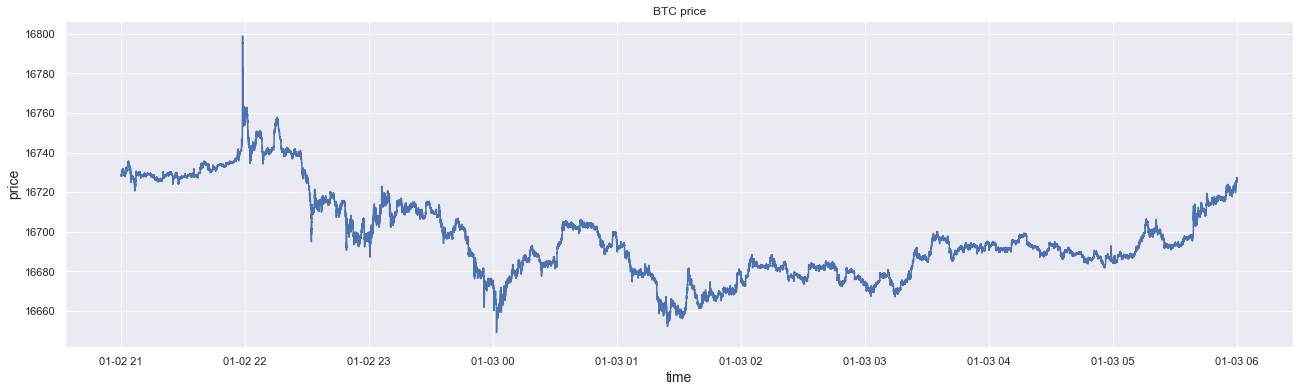

In [7]:
plt.figure(figsize=(22,6))
plt.plot(df['receive_ts'], df['btcusdt:Binance:Spot_ask_price_0'])
plt.title("BTC price")
plt.xlabel('time', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.show()

In [8]:
vol_e3 = pd.read_csv('moving_vol_test_e-3.csv')
pnl_e3 = pd.read_csv('pnl_gueant_moving_vol_test_e-3.csv')
q_e3 = pd.read_csv('q_gueant_moving_vol_e-3.csv')
vol_e3['1'] = pd.to_datetime(vol_e3['1'])
q_e3['1'] = pd.to_datetime(q_e3['1'])
pnl_e3['receive_ts'] = pd.to_datetime(pnl_e3['receive_ts'])

In [9]:
vol_e0 = pd.read_csv('moving_vol_test_e-0.csv')
pnl_e0 = pd.read_csv('pnl_gueant_moving_vol_test_e-0.csv')
q_e0 = pd.read_csv('q_gueant_moving_vol_e-0.csv')
vol_e0['1'] = pd.to_datetime(vol_e0['1'])
q_e0['1'] = pd.to_datetime(q_e0['1'])
pnl_e0['receive_ts'] = pd.to_datetime(pnl_e0['receive_ts'])

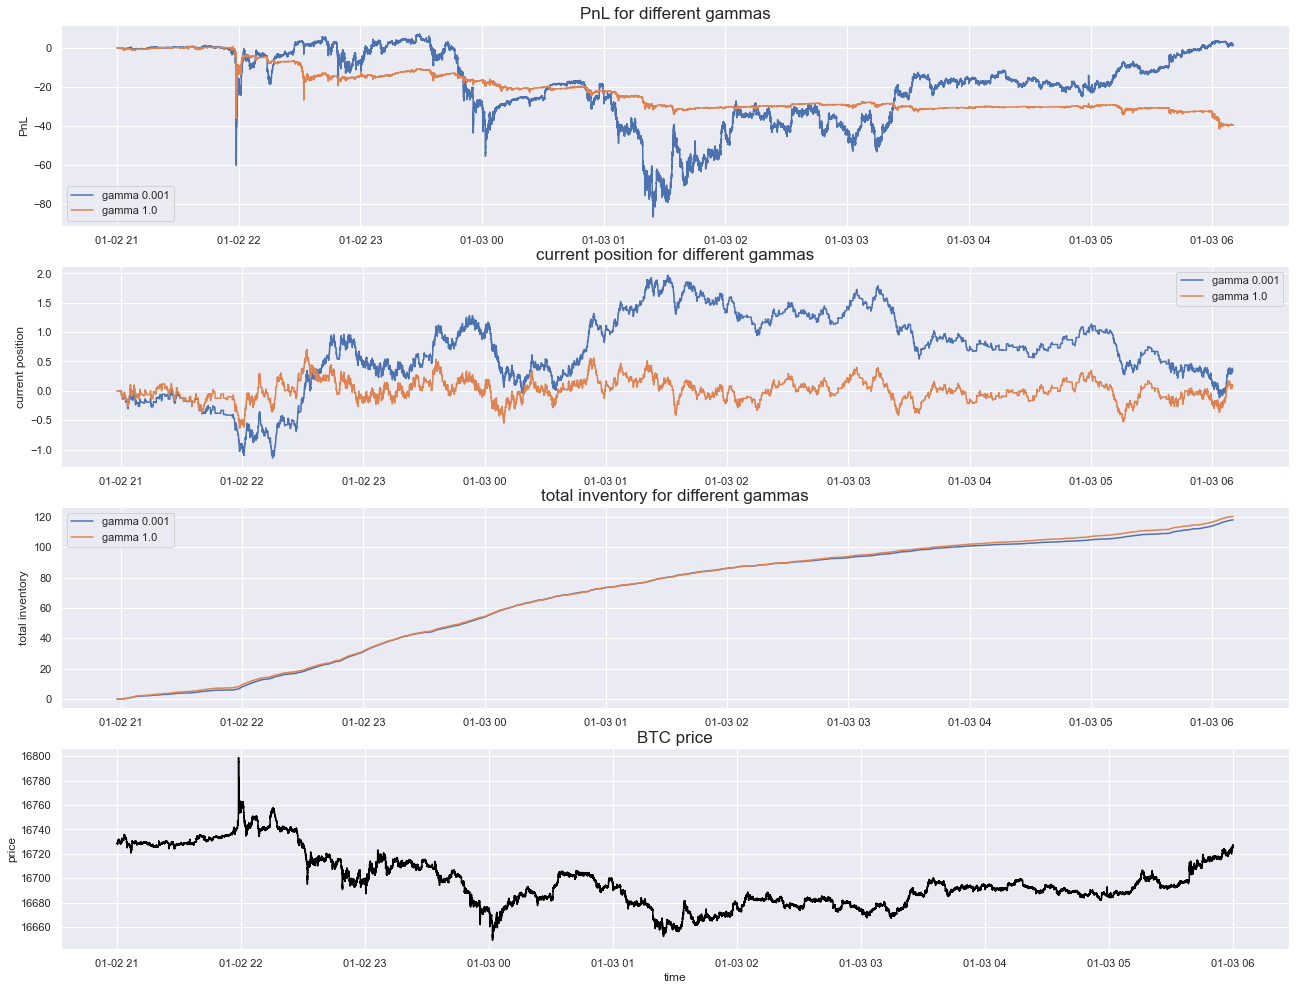

In [10]:
plt.figure(figsize=(22,17))

plt.subplot(4, 1, 1)
plt.plot(pnl_e3['receive_ts'],pnl_e3['total'], label = 'gamma 0.001')
plt.plot(pnl_e0['receive_ts'],pnl_e0['total'], label = 'gamma 1.0')
plt.ylabel('PnL')
plt.title('PnL for different gammas', fontsize=17)
plt.legend()

plt.subplot(4,1,2)
plt.plot(q_e3['1'],q_e3['0'], label = 'gamma 0.001')
plt.plot(q_e0['1'],q_e0['0'], label = 'gamma 1.0')
plt.ylabel('current position')
plt.title('current position for different gammas', fontsize=17)
plt.legend()

plt.subplot(4,1,3)
plt.plot(pnl_e3['receive_ts'],pnl_e3['BTC'], label = 'gamma 0.001')
plt.plot(pnl_e0['receive_ts'],pnl_e0['BTC'], label = 'gamma 1.0')
plt.ylabel('total inventory')
plt.title('total inventory for different gammas', fontsize=17)
plt.legend()

plt.subplot(4,1,4)
plt.plot(df['receive_ts'], df['btcusdt:Binance:Spot_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price', fontsize=17)

plt.show()

choose gamma = 1.0 or 0.001 depends on how volatile our asset. imo it's better to combine these two strategies in relation to asset's volatility

now lets test our model on market data with rebates - ethusdt (-0.004%, 0.04%)

In [11]:
path = 'ethusdt_'

lobs_eth = pd.read_csv(f'{path}lob.csv')
trades_eth = pd.read_csv(f'{path}trades.csv')

In [12]:
#check if data has nones
lobs_eth.isna().sum().sum()+trades_eth.isna().sum().sum()

0

In [13]:
lobs_eth['receive_ts'] = pd.to_datetime(lobs_eth['receive_ts'])

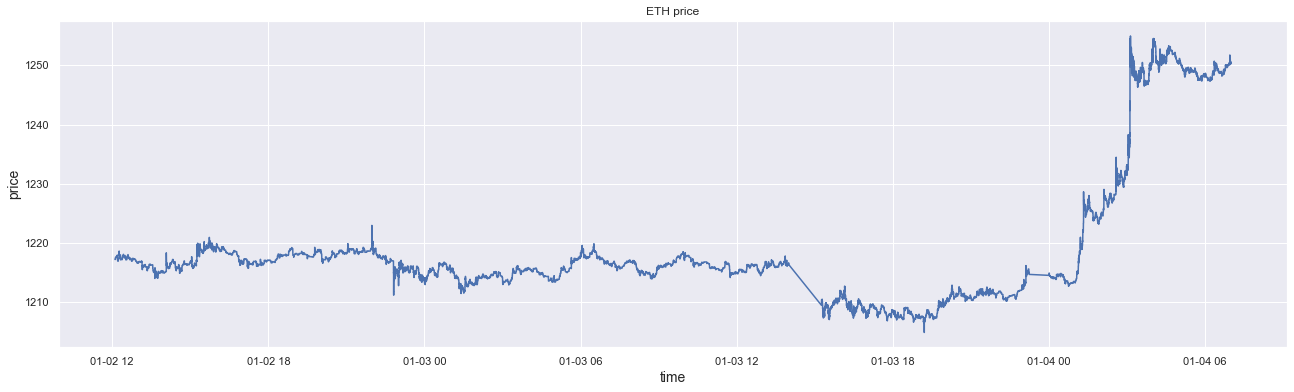

In [14]:
plt.figure(figsize=(22,6))
plt.plot(lobs_eth['receive_ts'], lobs_eth['ethusdt:Binance:Spot_ask_price_0'])
plt.title("ETH price")
plt.xlabel('time', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.show()

lets choose same start and end points

In [15]:
start_time = '2023-01-02 21:00:00'
end_time = '2023-01-03 06:00:00'

df_eth = lobs_eth[(lobs_eth.receive_ts > start_time) & (lobs_eth.receive_ts < end_time)]

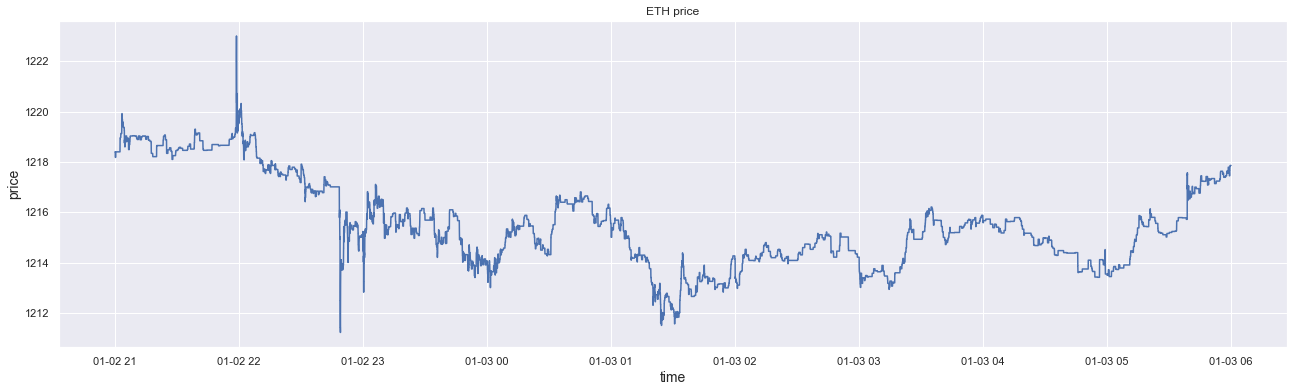

In [16]:
plt.figure(figsize=(22,6))
plt.plot(df_eth['receive_ts'], df_eth['ethusdt:Binance:Spot_ask_price_0'])
plt.title("ETH price")
plt.xlabel('time', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.show()

In [17]:
eth_vol_e0 = pd.read_csv('eth_moving_vol_test_e-0.csv')
eth_pnl_e0 = pd.read_csv('eth_pnl_gueant_moving_vol_test_e-0.csv')
eth_q_e0 = pd.read_csv('eth_q_gueant_moving_vol_e-0.csv')
eth_vol_e0['1'] = pd.to_datetime(eth_vol_e0['1'])
eth_q_e0['1'] = pd.to_datetime(eth_q_e0['1'])
eth_pnl_e0['receive_ts'] = pd.to_datetime(eth_pnl_e0['receive_ts'])

In [18]:
eth_vol_e3 = pd.read_csv('eth_moving_vol_test_e-3.csv')
eth_pnl_e3 = pd.read_csv('eth_pnl_gueant_moving_vol_test_e-3.csv')
eth_q_e3 = pd.read_csv('eth_q_gueant_moving_vol_e-3.csv')
eth_vol_e3['1'] = pd.to_datetime(eth_vol_e3['1'])
eth_q_e3['1'] = pd.to_datetime(eth_q_e3['1'])
eth_pnl_e3['receive_ts'] = pd.to_datetime(eth_pnl_e3['receive_ts'])

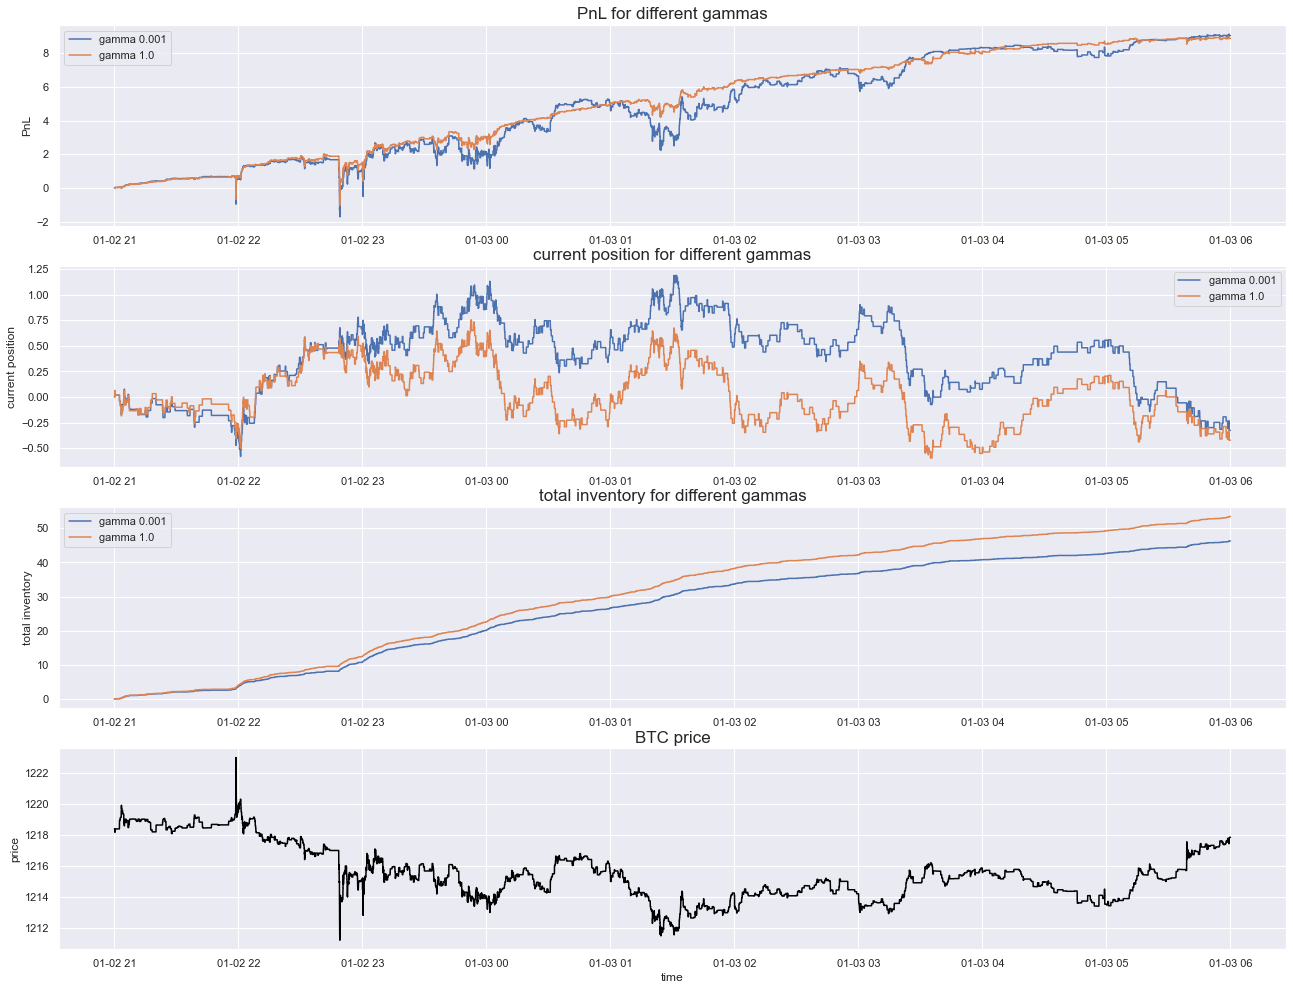

In [19]:
plt.figure(figsize=(22,17))

plt.subplot(4, 1, 1)
plt.plot(eth_pnl_e3['receive_ts'],eth_pnl_e3['total'], label = 'gamma 0.001')
plt.plot(eth_pnl_e0['receive_ts'],eth_pnl_e0['total'], label = 'gamma 1.0')
plt.ylabel('PnL')
plt.title('PnL for different gammas', fontsize=17)
plt.legend()

plt.subplot(4,1,2)
plt.plot(eth_q_e3['1'],eth_q_e3['0'], label = 'gamma 0.001')
plt.plot(eth_q_e0['1'],eth_q_e0['0'], label = 'gamma 1.0')
plt.ylabel('current position')
plt.title('current position for different gammas', fontsize=17)
plt.legend()

plt.subplot(4,1,3)
plt.plot(eth_pnl_e3['receive_ts'],eth_pnl_e3['BTC'], label = 'gamma 0.001')
plt.plot(eth_pnl_e0['receive_ts'],eth_pnl_e0['BTC'], label = 'gamma 1.0')
plt.ylabel('total inventory')
plt.title('total inventory for different gammas', fontsize=17)
plt.legend()

plt.subplot(4,1,4)
plt.plot(df_eth['receive_ts'], df_eth['ethusdt:Binance:Spot_ask_price_0'], color='black')
plt.xlabel('time')
plt.ylabel('price')
plt.title('BTC price', fontsize=17)

plt.show()

as we can see, here model with gamma = 1.0 more consistent. also it's better to choose gamma = 1.0 because we have lower risk (inventory fluctuates around 0)